### ☕ Coffee Quality database from CQI ☕

These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers.
https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi


_______
Importando bibliotecas
_____

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

_______
Importando o dataset
___

In [3]:
df_coffee = pd.read_csv('merged_data_cleaned.csv')
df_coffee.shape

(1339, 44)

In [4]:
df_coffee.head(3)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [5]:
df_coffee.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [6]:
cols = [0,2,4,5,6,7,11,37,38,39]

df_coffee.drop(df_coffee.columns[cols], axis = 1, inplace = True)

In [7]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Country.of.Origin     1338 non-null   object 
 2   Company               1130 non-null   object 
 3   Altitude              1113 non-null   object 
 4   Region                1280 non-null   object 
 5   Number.of.Bags        1339 non-null   int64  
 6   Bag.Weight            1339 non-null   object 
 7   In.Country.Partner    1339 non-null   object 
 8   Harvest.Year          1292 non-null   object 
 9   Grading.Date          1339 non-null   object 
 10  Owner.1               1332 non-null   object 
 11  Variety               1113 non-null   object 
 12  Processing.Method     1169 non-null   object 
 13  Aroma                 1339 non-null   float64
 14  Flavor                1339 non-null   float64
 15  Aftertaste           

In [8]:
df_coffee['Region'][df_coffee['Region'].isna()] = 'Desconhecida'

In [9]:
#Dropando a linha em que o país era NaN 
df_coffee[df_coffee['Country.of.Origin'].isna()]
df_coffee.drop([1197, 1310], inplace = True)

In [10]:
df_coffee.describe().round(3)
#Altitude maxima esta bem alta - outlier

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1336.000,1337.000,1108.000,1108.000,1108.000
mean,154.096,7.573,7.527,7.407,7.542,7.523,7.524,9.842,9.842,9.864,7.509,82.154,0.088,0.480,0.174,3.558,1751.030,1799.708,1775.369
std,130.042,0.315,0.341,0.349,0.319,0.308,0.354,0.485,0.716,0.554,0.427,2.687,0.048,2.552,0.833,5.316,8673.349,8672.712,8672.533
min,0.000,5.080,6.080,6.170,5.250,5.080,5.250,6.000,0.000,1.330,5.170,59.830,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,14.000,7.420,7.330,7.250,7.330,7.330,7.330,10.000,10.000,10.000,7.250,81.170,0.090,0.000,0.000,0.000,1100.000,1100.000,1100.000
50%,175.000,7.580,7.580,7.420,7.580,7.500,7.500,10.000,10.000,10.000,7.500,82.500,0.110,0.000,0.000,2.000,1310.640,1350.000,1310.640
75%,275.000,7.750,7.750,7.580,7.750,7.670,7.750,10.000,10.000,10.000,7.750,83.670,0.120,0.000,0.000,4.000,1600.000,1650.000,1600.000
max,1062.000,8.750,8.830,8.670,8.750,8.580,8.750,10.000,10.000,10.000,10.000,90.580,0.280,63.000,11.000,55.000,190164.000,190164.000,190164.000


____
Corrigindo altitudes
____

<AxesSubplot:ylabel='altitude_low_meters'>

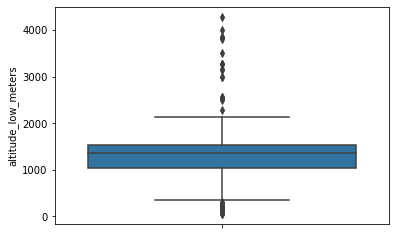

In [35]:
sns.boxplot(data=df_coffee, y=df_coffee['altitude_low_meters'])

<AxesSubplot:ylabel='altitude_mean_meters'>

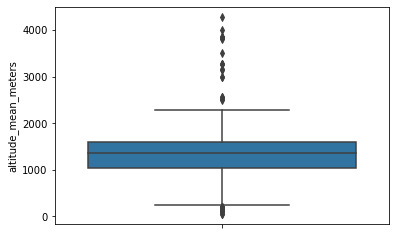

In [34]:
sns.boxplot(data=df_coffee, y=df_coffee['altitude_mean_meters'])

<AxesSubplot:ylabel='altitude_high_meters'>

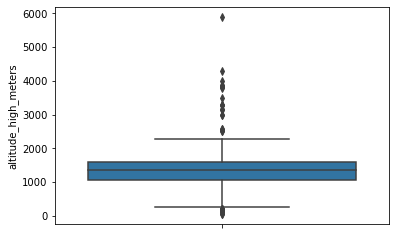

In [33]:
sns.boxplot(data=df_coffee, y=df_coffee['altitude_high_meters'])

In [11]:
#Identificando países que tem altitudes muito elevadas
#Chega-se à conclusão que Brasil, Guatemala e Nicaragua tem altitudes que são bem elevadas e foram inseridas errado.
df_coffee.iloc[:,[1,31,32,33]].groupby('Country.of.Origin').max().round(2)

,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Country.of.Origin,,,
Brazil,11000.00,11000.00,11000.00
Burundi,1880.00,1880.00,1880.00
China,1850.00,1850.00,1850.00
Colombia,2560.00,5900.00,3850.00
Costa Rica,1900.00,1900.00,1900.00
Cote d?Ivoire,200.00,200.00,200.00
Ecuador,800.00,800.00,800.00
El Salvador,1500.00,1500.00,1500.00
Ethiopia,2000.00,2200.00,2075.00


In [12]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["altitude_high_meters"] >= 2000)].iloc[:,[1,31,32,33]]
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna].loc[df_coffee[coluna] == 11000] = 1100


In [13]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Nicaragua") & (df_coffee["altitude_high_meters"] >= 1000)].iloc[:,[1,31,32,33]]

for coluna in cols:
    df_coffee[coluna].loc[df_coffee[coluna] == 110000] = 1100

In [14]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["altitude_high_meters"] >= 2000)].iloc[:,[1,31,32,33]]

,Country.of.Origin,altitude_low_meters,altitude_high_meters,altitude_mean_meters
215,Guatemala,3280.0,3280.0,3280.0
419,Guatemala,2100.0,2100.0,2100.0
837,Guatemala,3280.0,3280.0,3280.0
896,Guatemala,190164.0,190164.0,190164.0
1001,Guatemala,3280.0,3280.0,3280.0
1144,Guatemala,190164.0,190164.0,190164.0


In [16]:
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna][(df_coffee[coluna] == 190164)] = df_coffee[coluna][df_coffee['Country.of.Origin'] == 'Guatemala'].mean()

In [17]:
#Identificando países com baixas altitudes
df_coffee.iloc[:,[1,31,32,33]].groupby('Country.of.Origin').min().round(2)

,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Country.of.Origin,,,
Brazil,1.00,1.00,1.00
Burundi,1700.00,1700.00,1700.00
China,1100.00,1100.00,1100.00
Colombia,165.00,165.00,165.00
Costa Rica,13.00,13.00,13.00
Cote d?Ivoire,200.00,200.00,200.00
Ecuador,40.00,40.00,40.00
El Salvador,1200.00,1200.00,1200.00
Ethiopia,1097.28,1550.00,1493.52


In [ ]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["altitude_high_meters"] < 100)].iloc[:,[1,4,31,32,33]]

,Country.of.Origin,Region,altitude_low_meters,altitude_high_meters,altitude_mean_meters
41,Brazil,sul de minas - carmo de minas,12.0,12.0,12.0
42,Brazil,sul de minas - carmo de minas,12.0,12.0,12.0
279,Brazil,south of minas,1.0,1.0,1.0
481,Brazil,south of minas,1.0,1.0,1.0
613,Brazil,south of minas,1.0,1.0,1.0
683,Brazil,south of minas,1.0,1.0,1.0
737,Brazil,south of minas,1.0,1.0,1.0
761,Brazil,south of minas,1.0,1.0,1.0
780,Brazil,south of minas,1.0,1.0,1.0
838,Brazil,south of minas,1.0,1.0,1.0


In [18]:
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "sul de minas - carmo de minas")] =  1200
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "south of minas")] =  1000
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "sul de minas")] =  1250


In [20]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Kenya")].iloc[:,[1,4,31,32,33]]
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Kenya") & (df_coffee[coluna] < 600)] = df_coffee[coluna][df_coffee['Country.of.Origin'] == 'Kenya'].mean()

In [21]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["Region"] == "el progreso")] =  1370
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["Region"] == "oriente")] =  1370


In [22]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Mexico") & (df_coffee["altitude_low_meters"] == 100)] =  1000
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Mexico") & (df_coffee["Region"] == "amatenango de la frontera")] =  1600


In [23]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Costa Rica") & (df_coffee["Region"] == "turrialba")] =  1300
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Costa Rica") & (df_coffee["altitude_low_meters"] == 185) & (df_coffee["Region"] == "tarrazu")] =  1850

____
Substituindo valores Nan nas altitudes
___

In [24]:
df_coffee[(df_coffee['altitude_low_meters'].isna())]

,Species,Country.of.Origin,Company,Altitude,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,...,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
5,Arabica,Brazil,NaN,NaN,Desconhecida,100,30 kg,Specialty Coffee Institute of Asia,2013,"September 3rd, 2013",...,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",m,NaN,NaN,NaN
6,Arabica,Peru,richmond investment-coffee department,NaN,Desconhecida,100,69 kg,Specialty Coffee Institute of Asia,2012,"September 17th, 2012",...,0.11,0,0.0,Bluish-Green,0,"September 17th, 2013",m,NaN,NaN,NaN
17,Arabica,Ethiopia,NaN,NaN,yirgacheffe,150,6,Ethiopia Commodity Exchange,2009/2010,"June 16th, 2010",...,0.05,0,0.0,NaN,2,"June 16th, 2011",m,NaN,NaN,NaN
24,Arabica,Ethiopia,NaN,NaN,sidamo,100,60 kg,Specialty Coffee Institute of Asia,2013,"September 3rd, 2013",...,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",m,NaN,NaN,NaN
26,Arabica,Ethiopia,NaN,NaN,sidamo,150,6,Ethiopia Commodity Exchange,2009/2010,"June 16th, 2010",...,0.05,0,0.0,NaN,2,"June 16th, 2011",m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,Arabica,United States (Hawaii),kona pacific farmers cooperative,NaN,kona,11,100 lbs,Specialty Coffee Association,2014,"March 10th, 2014",...,0.11,5,0.0,Green,9,"March 10th, 2015",ft,NaN,NaN,NaN
1302,Arabica,Brazil,volcafe ltda.,NaN,cerrado,305,59 kg,Brazil Specialty Coffee Association,2017 / 2018,"October 27th, 2017",...,0.11,0,1.0,Green,55,"October 27th, 2018",m,NaN,NaN,NaN
1334,Robusta,Ecuador,robustasa,NaN,"san juan, playas",1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",...,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",m,NaN,NaN,NaN
1337,Robusta,India,cafe politico,NaN,Desconhecida,1,5 lbs,Specialty Coffee Association,2013,"August 25th, 2014",...,0.10,20,0.0,Green,1,"August 25th, 2015",m,NaN,NaN,NaN


In [25]:
# Valores vazios foram substituídos pela média do país
paises = df_coffee['Country.of.Origin'].unique()
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for pais in paises:
        for coluna in cols:
                df_coffee[coluna][(df_coffee[coluna].isna()) & (df_coffee['Country.of.Origin'] == pais)] = df_coffee[coluna][(df_coffee['Country.of.Origin'] == pais)].mean()


In [36]:
df_coffee.columns

Index(['Species', 'Country.of.Origin', 'Company', 'Altitude', 'Region',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

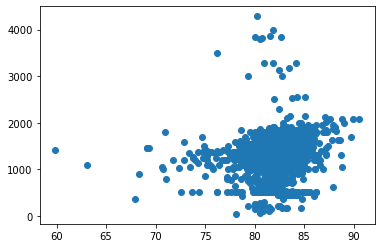

In [37]:
plt.scatter(df_coffee['Total.Cup.Points'], df_coffee['altitude_mean_meters'])

_____

### Análises
___

In [26]:
df_measures = df_coffee[['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity','Clean.Cup', 'Sweetness']]
display(df_measures.head())

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0


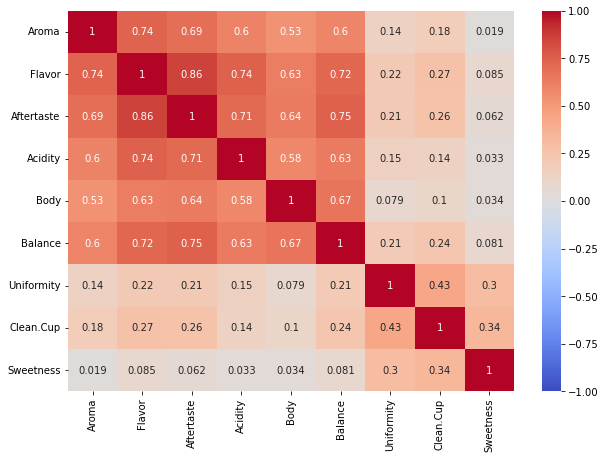

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df_measures.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot = True);

<Figure size 720x504 with 0 Axes>

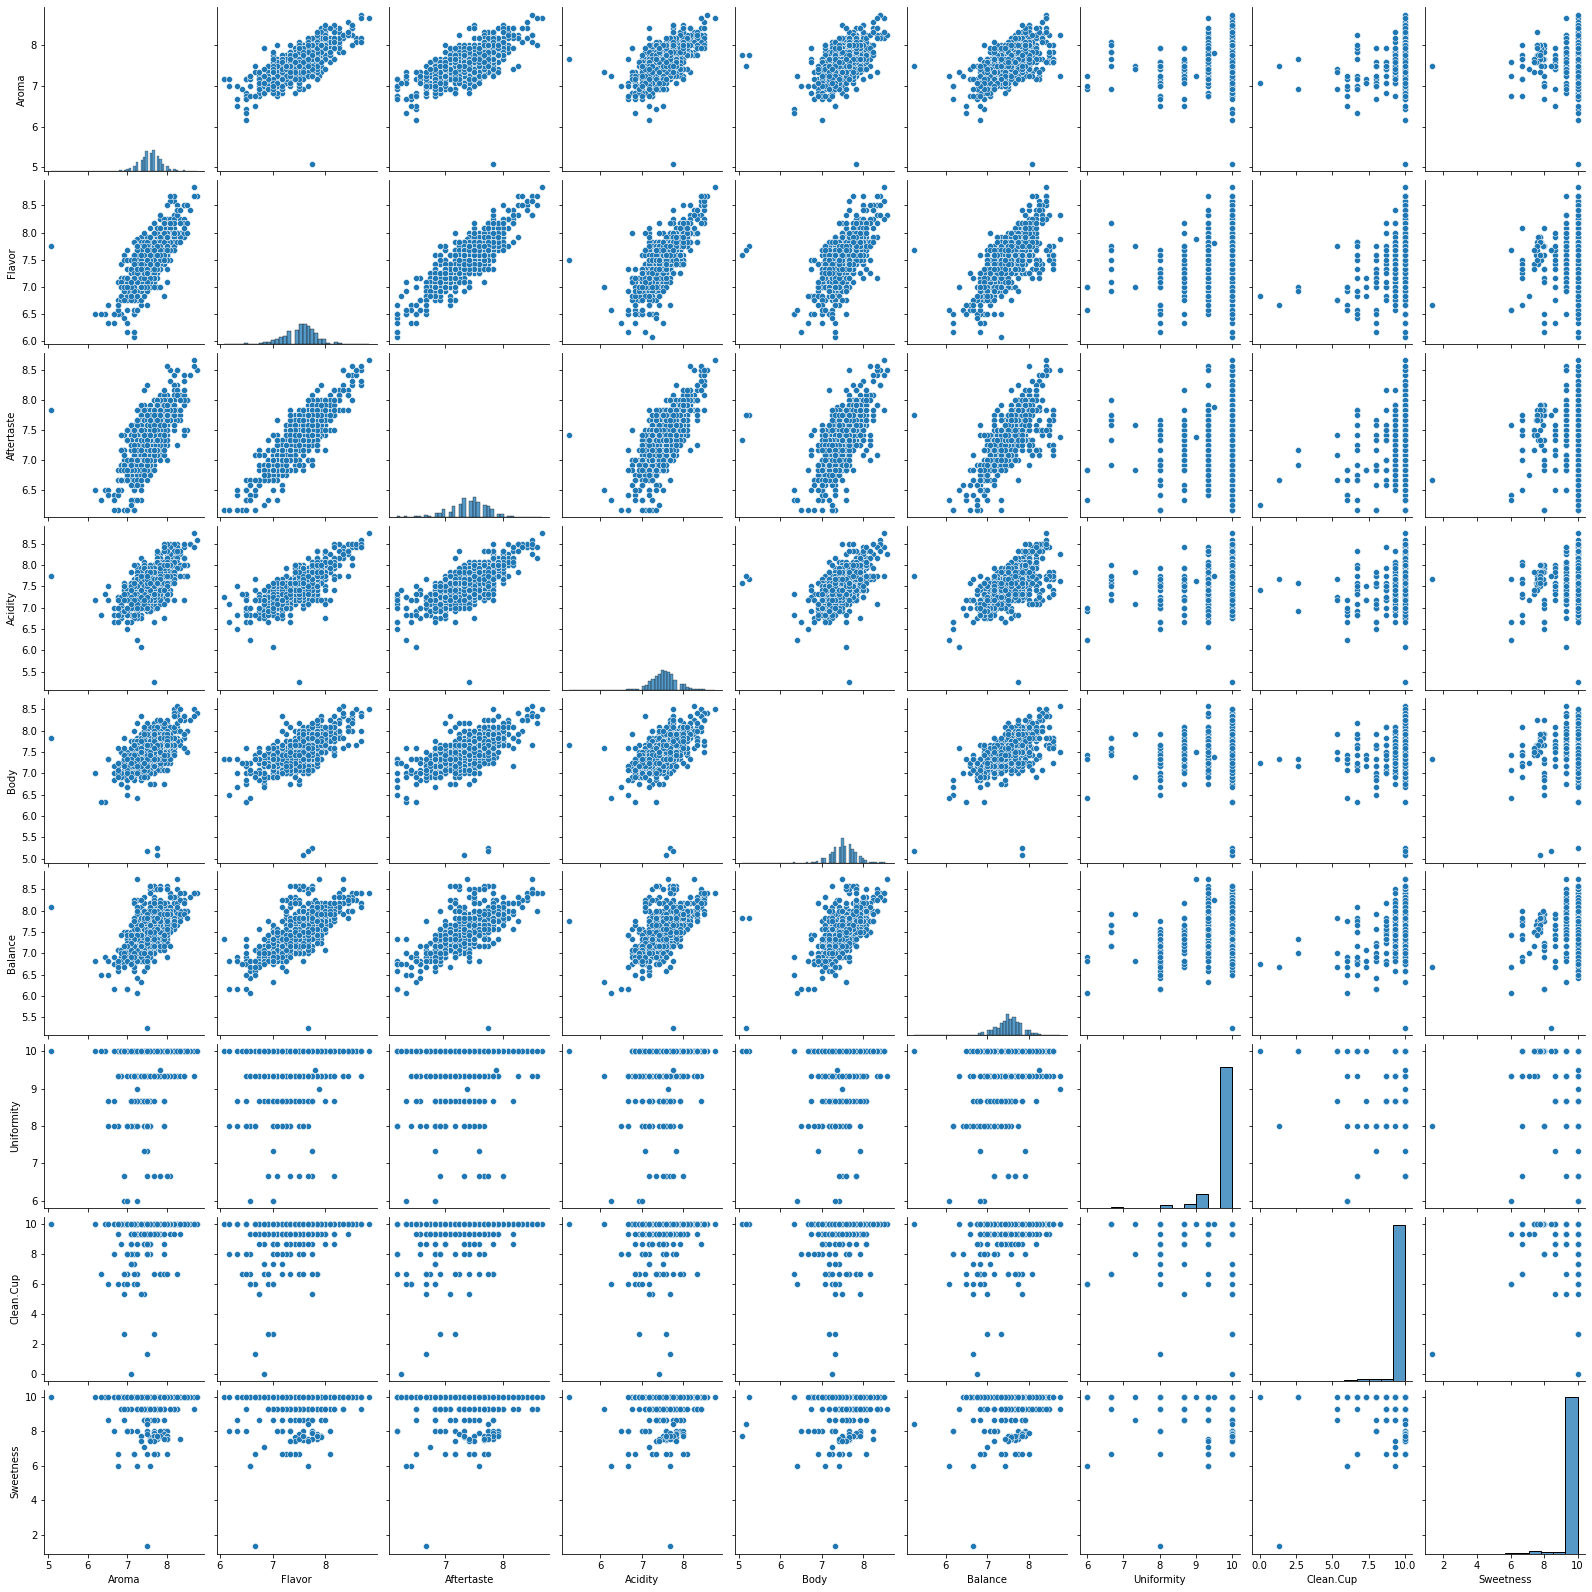

In [28]:
plt.figure(figsize=(10,7))
#sns.pairplot(df_measures);